In [1]:
from modules_clustering import *
from modules_preprocess import *
from modules_utils import *
from electra_package.modules_main2 import *
from modules_plots import *
from modules_fits import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def plot_2d(rotated_conds, rotated_extremos, rotated_apoyos):

    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.scatter(rotated_conds[1], rotated_conds[2], s = 1, label = "Original Conductors")
    plt.scatter(rotated_apoyos[1], rotated_apoyos[2], s = 1, label = "Cropped Conductors")

    plt.scatter(rotated_extremos[1], rotated_extremos[2], color='black')
    plt.title("YZ")

    plt.subplot(122)
    plt.scatter(rotated_conds[0], rotated_conds[1], s = 1, label = "Original Conductors")
    plt.scatter(rotated_apoyos[0], rotated_apoyos[1], s = 1, label = "Cropped Conductors")

    plt.scatter(rotated_extremos[0], rotated_extremos[1], color='black')
    plt.title("XY")

    # plt.show()

In [3]:
pathdata0 = os.getcwd()+"/../data/lineas_completas/VDI711.json"

bad_ids0 = get_bad_ids(pathdata0.split("json")[0]+"txt")

with open(pathdata0, 'r') as archivo:
    data = json.load(archivo)
    
print(len(data), bad_ids0)

129 ['C_13434448_13434449', 'C_13411888_13411891', 'C_13411767_13411770', 'C_13411767_13411776', 'C_13411775_13411776', 'C_13411824_13411828', 'C_13412064_13412065', 'C_13412051_13412064', 'C_13412143_13412144', 'C_13412141_13412144', 'C_13412101_13412104', 'C_13412104_13412105']


2024-07-15 14:26:47.656 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:47.658 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 8.968799999999987
2024-07-15 14:26:47.660 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:47.660 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.004103899002075195
2024-07-15 14:26:47.663 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: 2633354.788340805



Processing Vano 0
[array([500147.9987, 500147.9987, 499990.2981, 499990.2981]), array([4288995.3776, 4288995.3776, 4288901.9047, 4288901.9047]), array([892.6066, 906.2758, 887.0733, 896.3558])]
(4, 3)
[array([500147.91667342, 500147.91667342, 499989.2620483 , 499989.2620483 ]), array([4288995.58801281, 4288995.58801281, 4288900.53309208,
       4288900.53309208]), array([887.3931, 892.6761, 896.3619, 906.2758])]
distribución horizontal


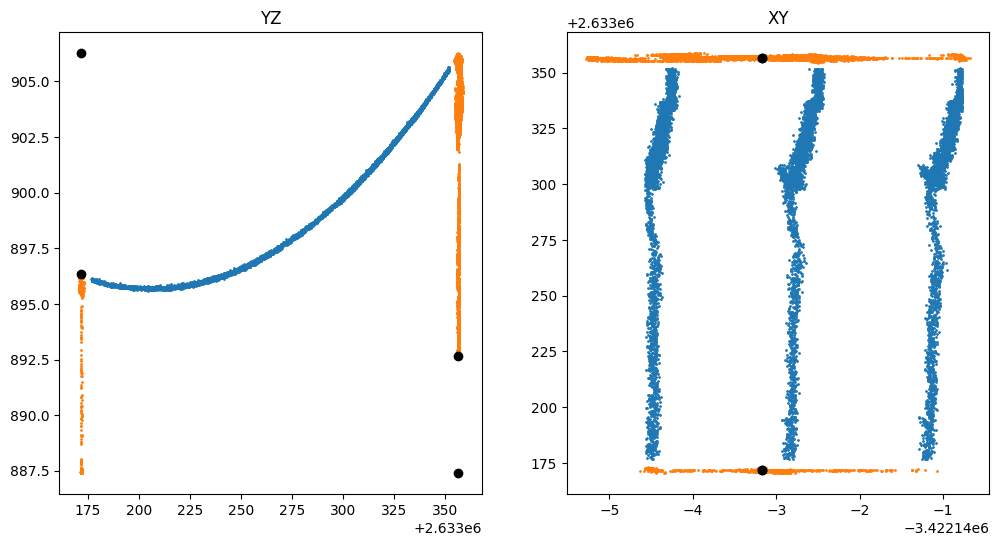

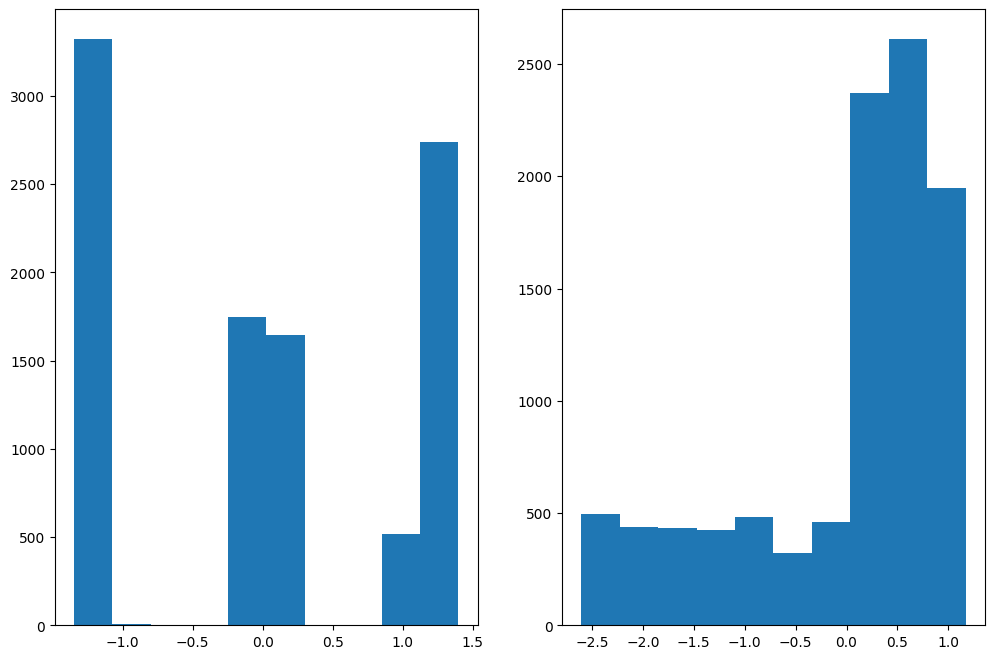

2024-07-15 14:26:48.052 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:48.054 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 11.246200000000044
2024-07-15 14:26:48.056 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:48.058 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.0057103633880615234
2024-07-15 14:26:48.059 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3853051.706730509
2024-07-15 14:26:48.060 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3852990.8588198167


0.7159181572166755 0.8550537390669843
2.742787166798747 3.772901383516418
1.0 0.8767699961729812
0.36380837958591333 0.33398488031451384

Processing Vano 1
[array([502687.2143, 502687.2143, 502645.4172, 502645.4172]), array([4291590.922 , 4291590.922 , 4291704.2068, 4291704.2068]), array([888.2523, 899.5556, 896.914 , 911.4563])]
(4, 3)
[array([502686.85429948, 502686.85429948, 502645.13950241, 502645.13950241]), array([4291590.60020026, 4291590.60020026, 4291703.78273835,
       4291703.78273835]), array([897.0626, 888.3094, 911.4563, 899.5556])]
distribución horizontal


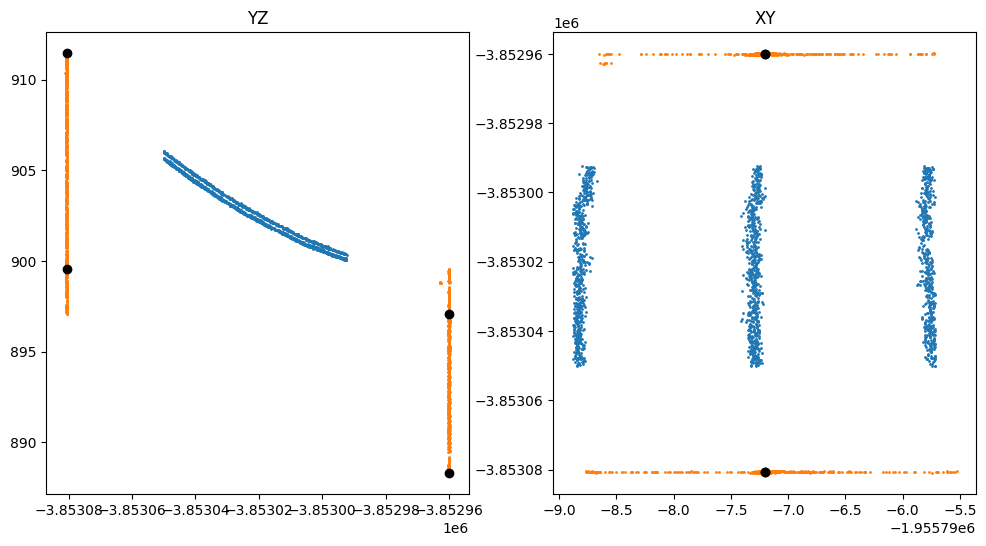

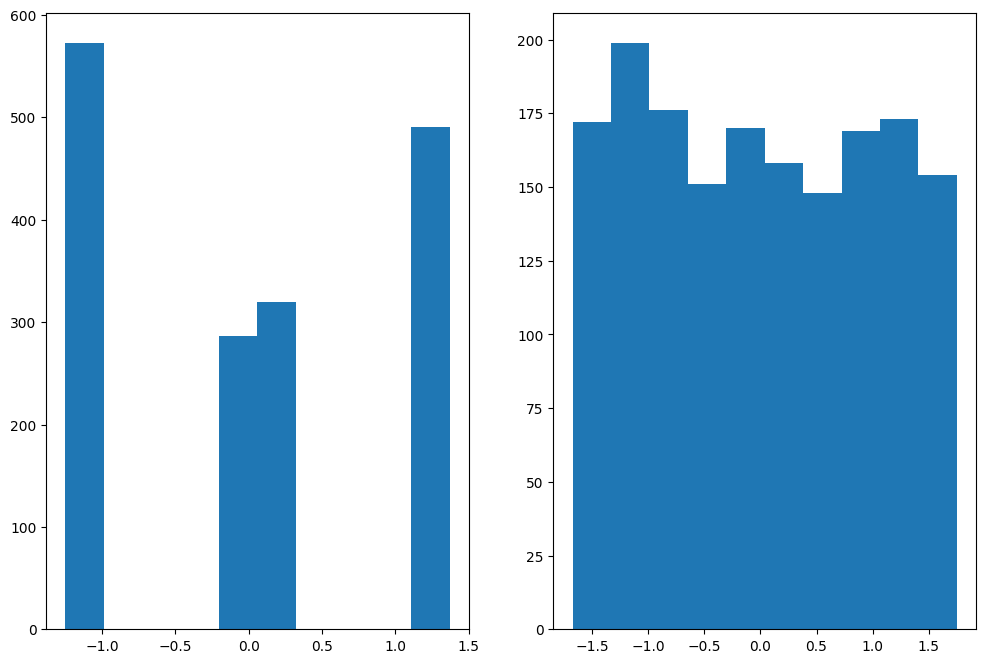

2024-07-15 14:26:48.386 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:48.388 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 14.009899999999902
2024-07-15 14:26:48.390 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:48.391 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.004689931869506836
2024-07-15 14:26:48.392 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3911500.331575522


0.7297878736680851 0.5711065670572004
2.6204809262298987 3.4252719717382396
1.0 0.2562814070351759
0.38024395002946476 0.07187862129020593

Processing Vano 2
[array([501580.7837, 501580.7837, 501611.5642, 501611.5642]), array([4294643.0253, 4294643.0253, 4294551.5291, 4294551.5291]), array([881.1816, 892.4399, 900.5851, 913.9667])]
(4, 3)
[array([501611.09780354, 501611.09780354, 501580.45392947, 501580.45392947]), array([4294551.411454  , 4294551.411454  , 4294642.65746821,
       4294642.65746821]), array([881.3635, 899.9568, 892.5804, 913.9667])]
distribución horizontal


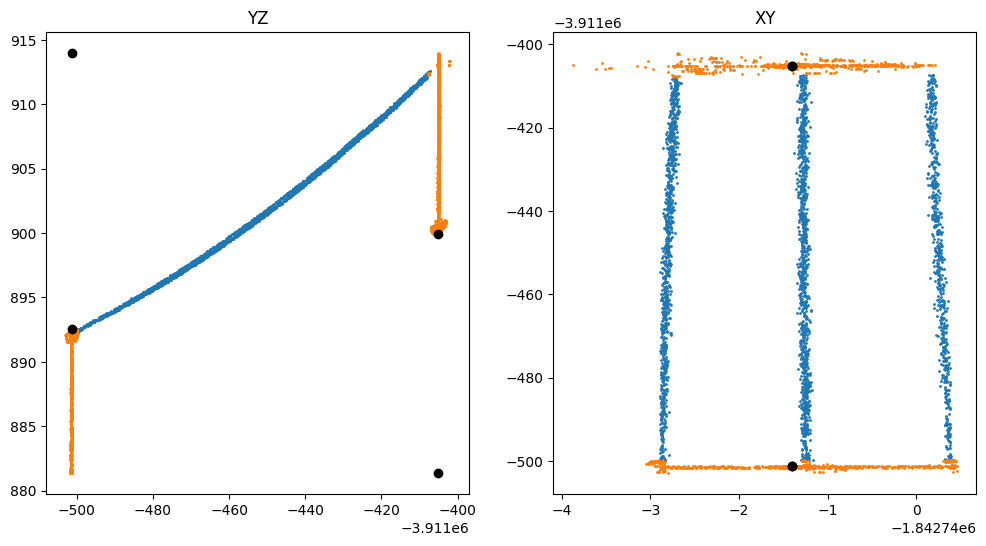

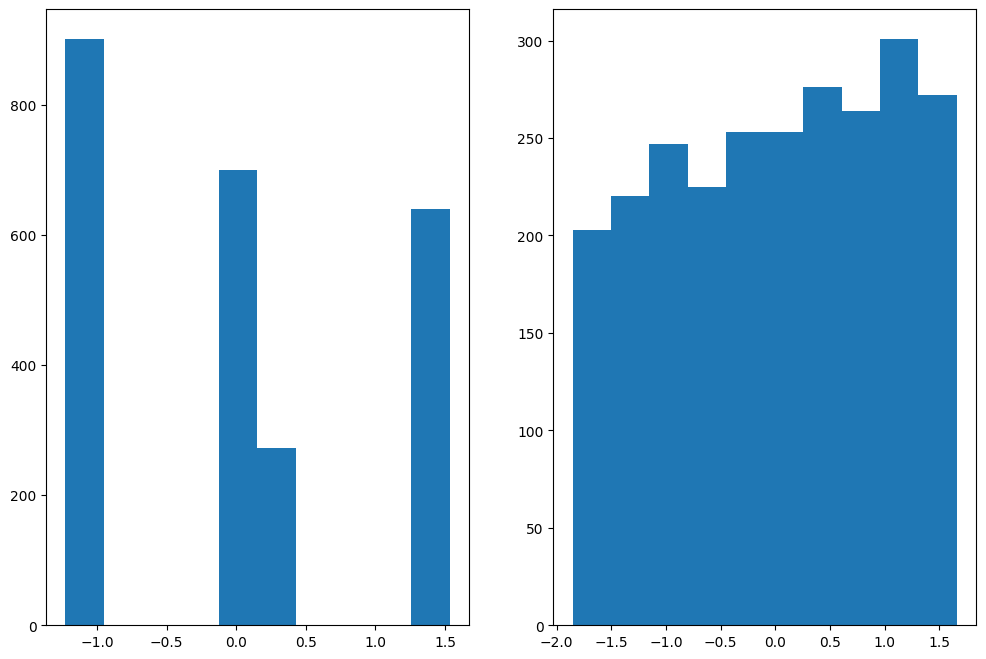

2024-07-15 14:26:48.716 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:48.718 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 11.454899999999952
2024-07-15 14:26:48.719 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:48.720 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.0035376548767089844
2024-07-15 14:26:48.722 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3911420.591054967
2024-07-15 14:26:48.723 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3911333.0737868724


0.6523607031883105 0.6027454982791735
2.762074000891441 3.5132785716608597
1.0 0.32558139534883723
0.3768045275837468 0.09217937110086645

Processing Vano 3
[array([501407.2557, 501407.2557, 501443.1576, 501443.1576]), array([4295156.9631, 4295156.9631, 4295051.1534, 4295051.1534]), array([849.5088, 861.0243, 857.43  , 868.7021])]
(4, 3)
[array([501442.41935125, 501442.41935125, 501406.81918746, 501406.81918746]), array([4295051.15113589, 4295051.15113589, 4295157.03790954,
       4295157.03790954]), array([849.4265, 857.2472, 861.0243, 868.7021])]
distribución horizontal


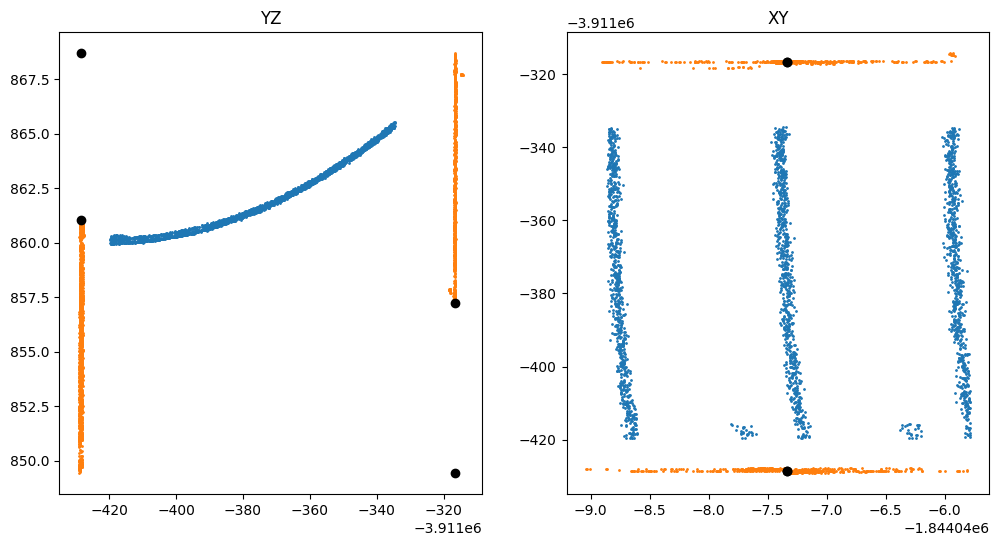

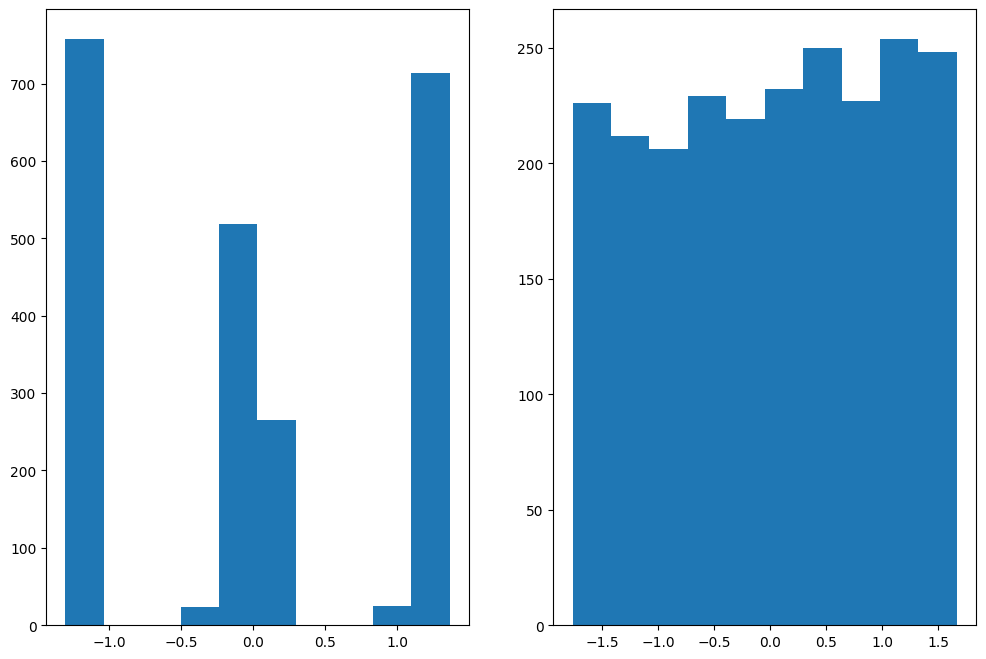

2024-07-15 14:26:49.056 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:49.058 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 13.489100000000008
2024-07-15 14:26:49.060 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:49.061 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.004826784133911133
2024-07-15 14:26:49.063 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3913146.828876419
2024-07-15 14:26:49.064 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3913091.7173309517


0.7328107642611521 0.5997754169865824
2.6704040380291385 3.433812603268625
1.0 0.1889763779527559
0.39430069356555253 0.06035447195796326

Processing Vano 4
[array([501089.349 , 501089.349 , 501122.8944, 501122.8944]), array([4296098.2125, 4296098.2125, 4295997.8708, 4295997.8708]), array([823.987 , 835.6506, 834.3501, 847.7572])]
(4, 3)
[array([501122.83626444, 501122.83626444, 501089.09482504, 501089.09482504]), array([4295997.86406399, 4295997.86406399, 4296098.36027701,
       4296098.36027701]), array([823.9457, 834.2681, 835.6506, 847.7572])]
distribución horizontal


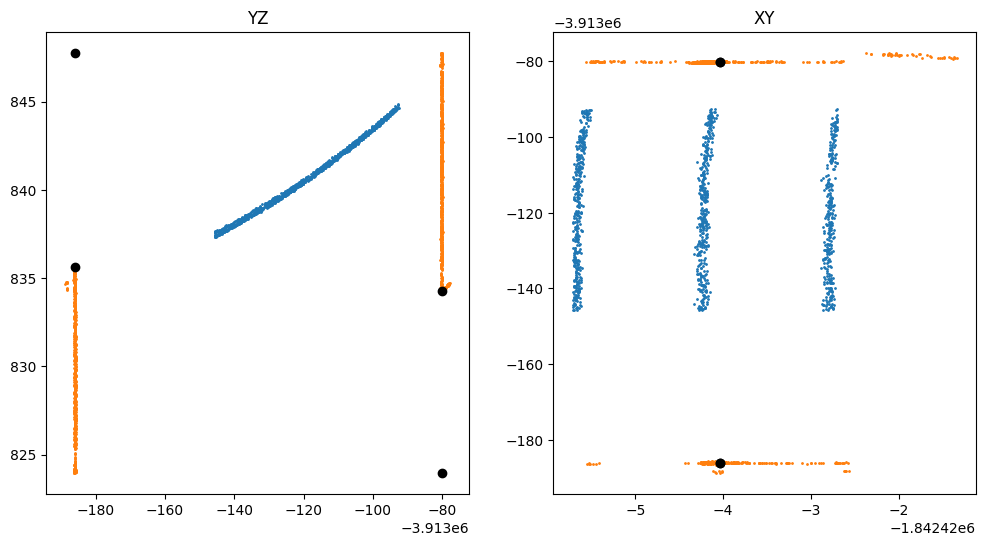

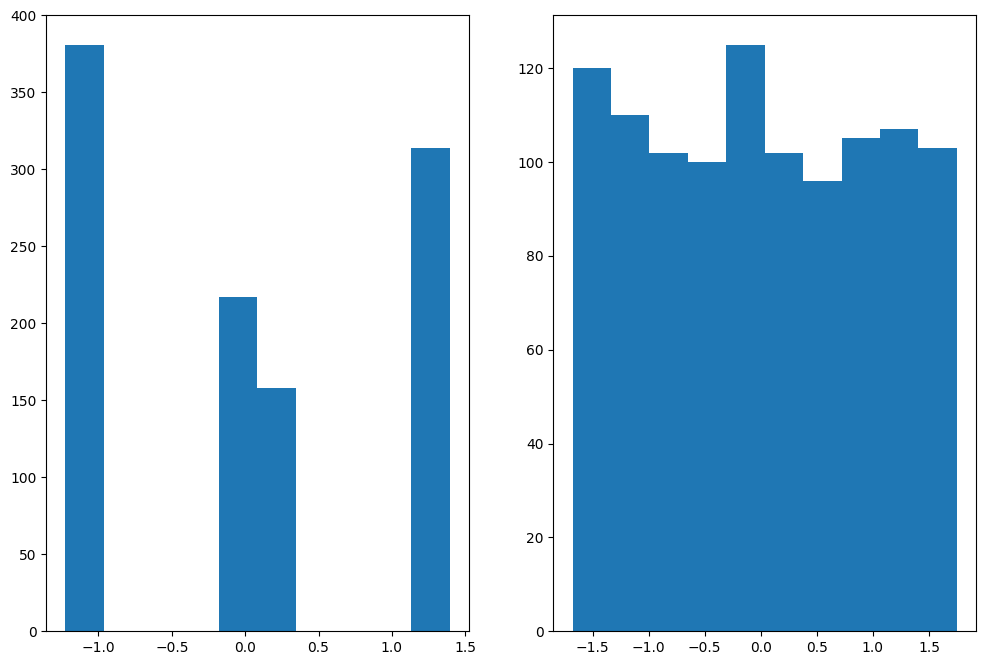

2024-07-15 14:26:49.411 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:49.413 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 11.388599999999997
2024-07-15 14:26:49.414 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:49.414 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.0032007694244384766
2024-07-15 14:26:49.416 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3911581.7106673513
2024-07-15 14:26:49.417 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3911535.1666118046


0.7178376780497846 0.5716936824979288
2.6187971770935548 3.428357309365577
1.0 0.23199999999999998
0.37240755696667605 0.0689115374955457

Processing Vano 5
[array([501513.1609, 501513.1609, 501547.5473, 501547.5473]), array([4294844.8984, 4294844.8984, 4294740.9733, 4294740.9733]), array([864.2951, 875.7566, 869.8463, 881.2103])]
(4, 3)
[array([501546.9936152 , 501546.9936152 , 501512.07679858, 501512.07679858]), array([4294741.37353848, 4294741.37353848, 4294845.32776635,
       4294845.32776635]), array([864.2655, 869.8217, 875.7566, 881.2103])]
distribución horizontal


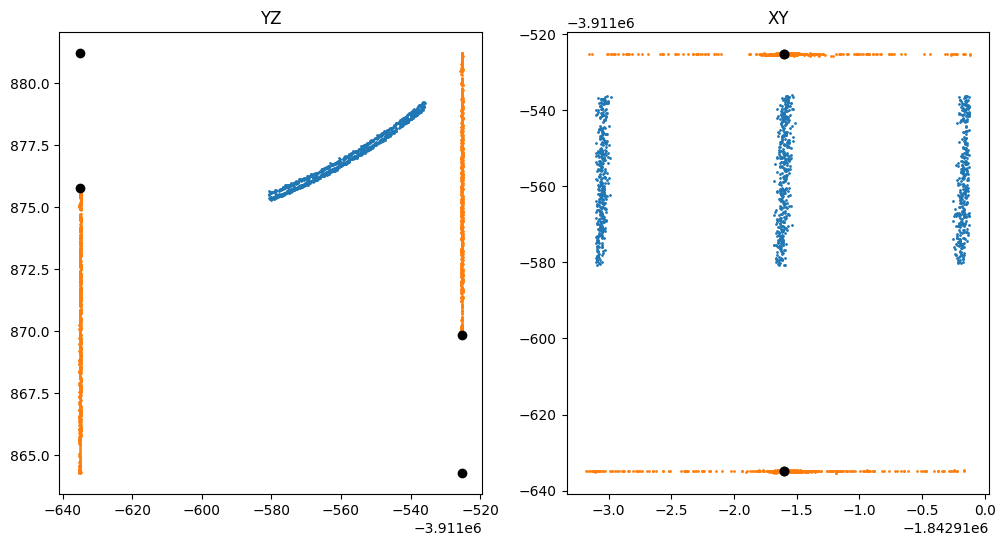

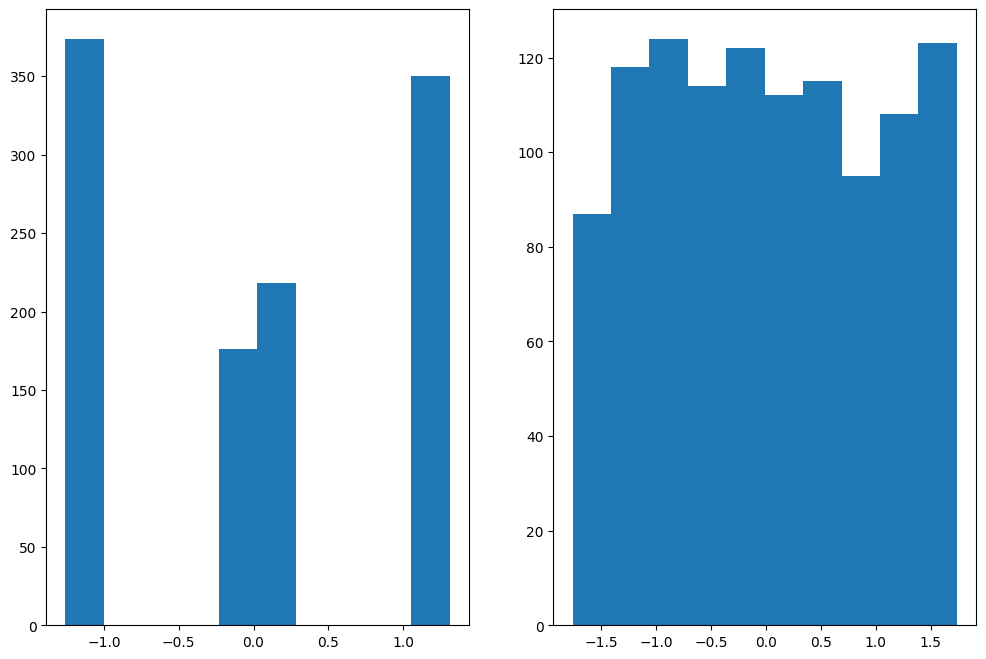

2024-07-15 14:26:49.786 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:49.788 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 11.21690000000001
2024-07-15 14:26:49.790 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:49.792 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.005280017852783203
2024-07-15 14:26:49.794 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3906330.578315648


0.7629793579745278 0.5749163269223898
2.5684598354479506 3.501512351559443
1.0 0.2983870967741935
0.39286037204910795 0.09347883955382

Processing Vano 6
[array([501580.7837, 501580.7837, 501547.5473, 501547.5473]), array([4294643.0253, 4294643.0253, 4294740.9733, 4294740.9733]), array([881.1816, 892.4399, 869.8463, 881.2103])]
(4, 3)
[array([501580.45392947, 501580.45392947, 501546.9936152 , 501546.9936152 ]), array([4294642.65746821, 4294642.65746821, 4294741.37353848,
       4294741.37353848]), array([869.8217, 881.3635, 881.2103, 892.5804])]
distribución horizontal


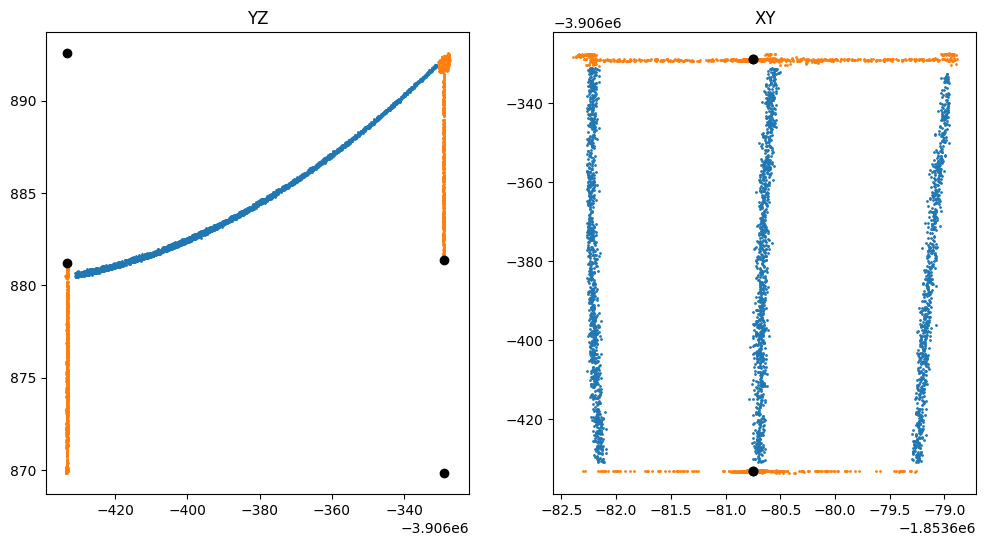

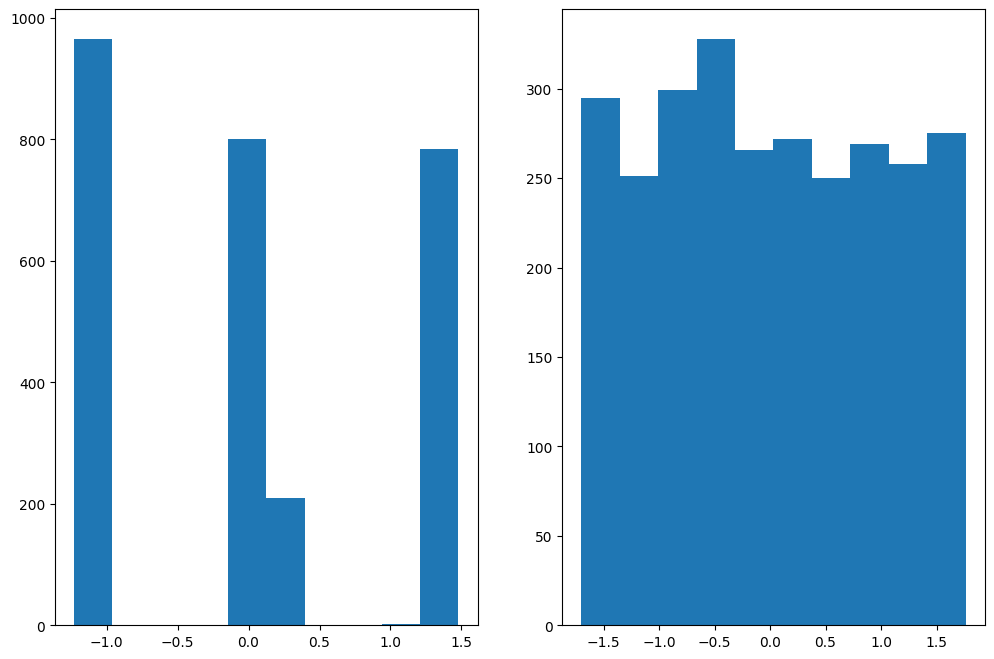

2024-07-15 14:26:50.147 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:50.148 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 13.045000000000073
2024-07-15 14:26:50.149 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:50.150 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.0031058788299560547
2024-07-15 14:26:50.152 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3877893.738722881


0.6765899181228171 0.5674757536201289
2.7066691073375346 3.462415114728981
1.0 0.23780487804878048
0.396913917272962 0.07074287653613458

Processing Vano 7
[array([501825.1267, 501825.1267, 501863.0789, 501863.0789]), array([4293956.4109, 4293956.4109, 4293849.0803, 4293849.0803]), array([881.6527, 893.0593, 881.0047, 883.3745])]
(4, 3)
[array([501862.7034117 , 501862.7034117 , 501825.04919681, 501825.04919681]), array([4293850.49878646, 4293850.49878646, 4293956.45223512,
       4293956.45223512]), array([881.6639, 881.1532, 893.0593, 894.1982])]
distribución horizontal


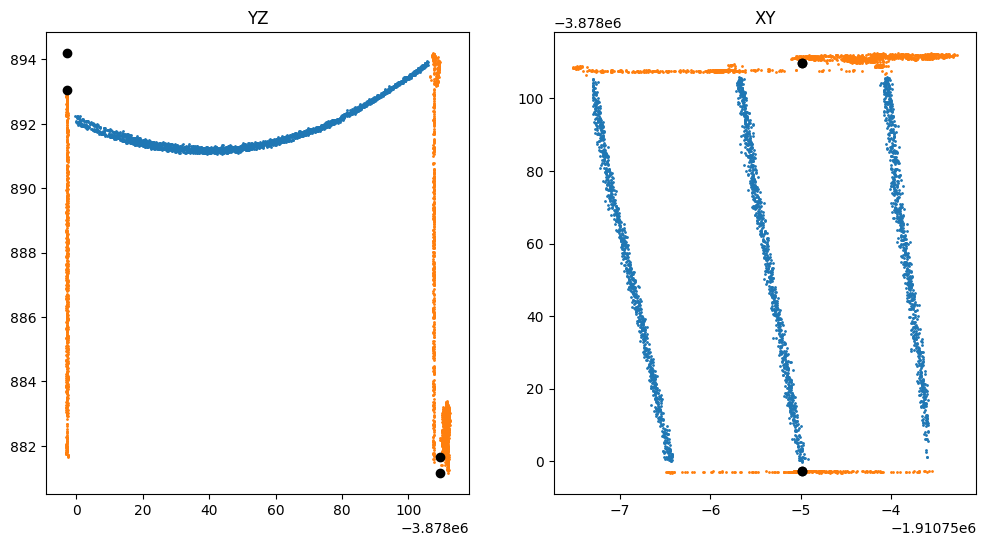

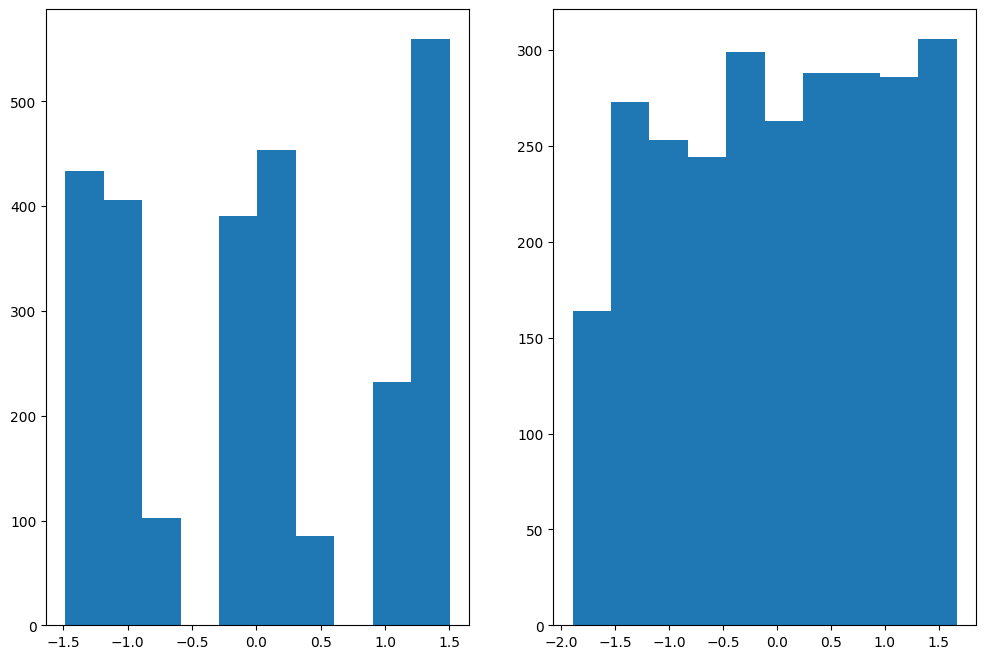

2024-07-15 14:26:50.499 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:50.501 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 11.282199999999989
2024-07-15 14:26:50.502 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:50.503 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.0039942264556884766
2024-07-15 14:26:50.506 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: -3849328.0593236615
2024-07-15 14:26:50.507 | DEBUG    | modules_preprocess:clean_outliers:341 - Umbral de corte superior detectado: -3849281.7015561126


0.6656077456850215 0.5990553795997389
2.9864441435486455 3.563198793016489
1.0 0.46405228758169936
0.3515419750244366 0.1272849597420979

Processing Vano 8
[array([501863.0789, 501863.0789, 501900.4505, 501900.4505]), array([4293849.0803, 4293849.0803, 4293748.9496, 4293748.9496]), array([881.0047, 883.3745, 880.1123, 891.4502])]
(4, 3)
[array([501900.30079582, 501900.30079582, 501862.7034117 , 501862.7034117 ]), array([4293749.43911379, 4293749.43911379, 4293850.49878646,
       4293850.49878646]), array([881.1532, 880.168 , 894.1982, 891.4502])]
distribución horizontal


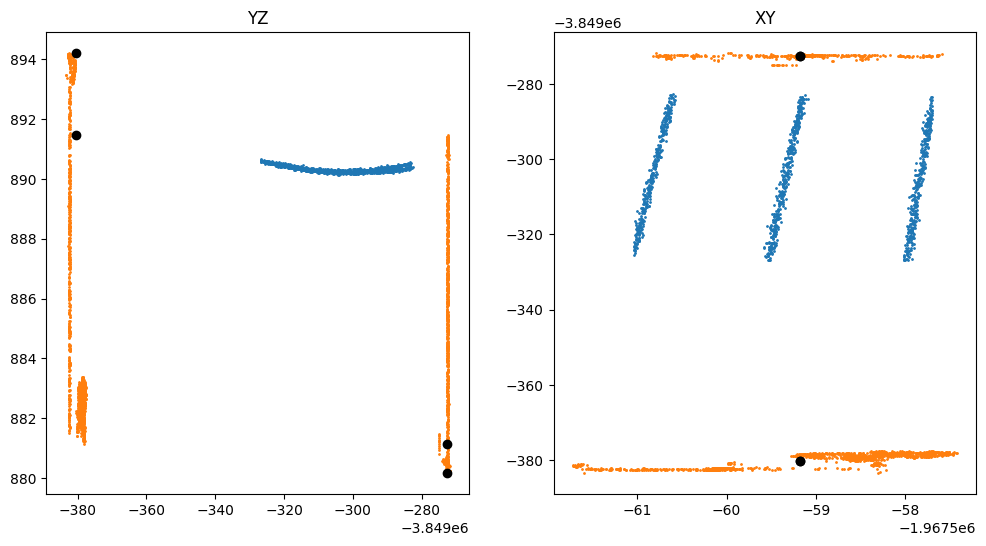

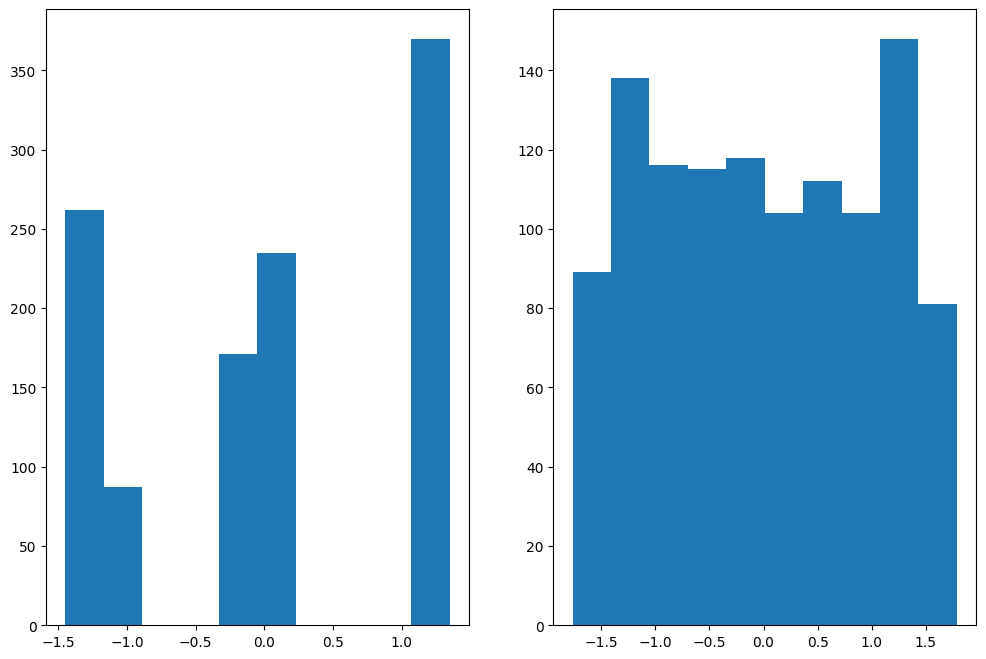

2024-07-15 14:26:50.876 | WARNING  | modules_main2:analyze_backings:18 - Redefining backings
2024-07-15 14:26:50.877 | DEBUG    | modules_preprocess:define_backings:592 - Distance between mean points: 10.884500000000003
2024-07-15 14:26:50.878 | DEBUG    | modules_preprocess:define_backings:621 - Invertir coordenadas
2024-07-15 14:26:50.879 | DEBUG    | modules_main2:analyze_backings:25 - Second time 0.003340482711791992
2024-07-15 14:26:50.880 | DEBUG    | modules_preprocess:clean_outliers:336 - Umbral de corte superior detectado: 3951003.0487010404


0.7407212536176673 0.5592023677120749
2.799256476313438 3.553920818388122
1.0 0.45270270270270274
0.35344128942356706 0.12906112899808952

Processing Vano 9
[array([502514.2668, 502514.2668, 502436.89  , 502436.89  ]), array([4292800.6795, 4292800.6795, 4292669.1793, 4292669.1793]), array([858.5669, 870.6807, 857.1567, 868.2373])]
(4, 3)
[array([502514.15191136, 502514.15191136, 502436.54764786, 502436.54764786]), array([4292800.3898417, 4292800.3898417, 4292669.1066938, 4292669.1066938]), array([857.3528, 858.645 , 868.2373, 870.6807])]
distribución horizontal


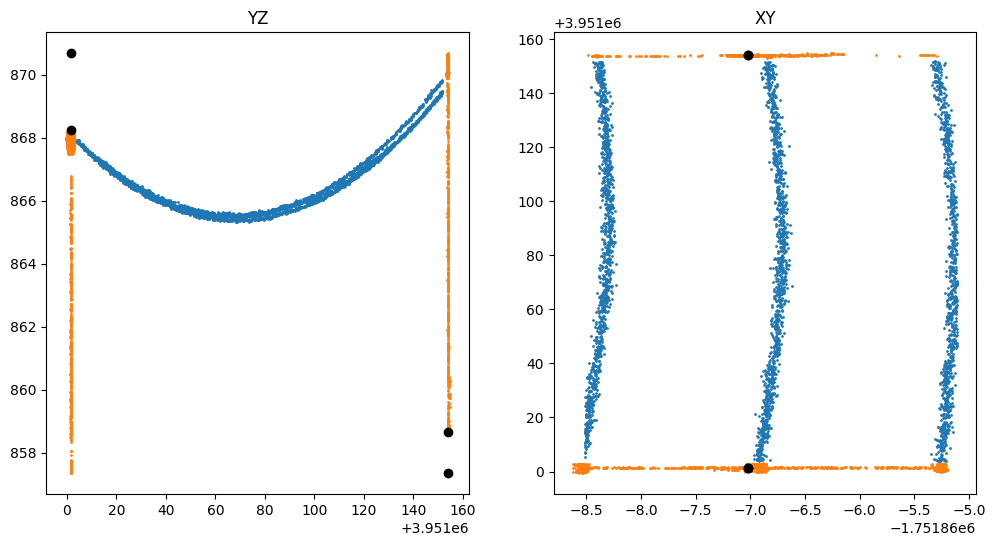

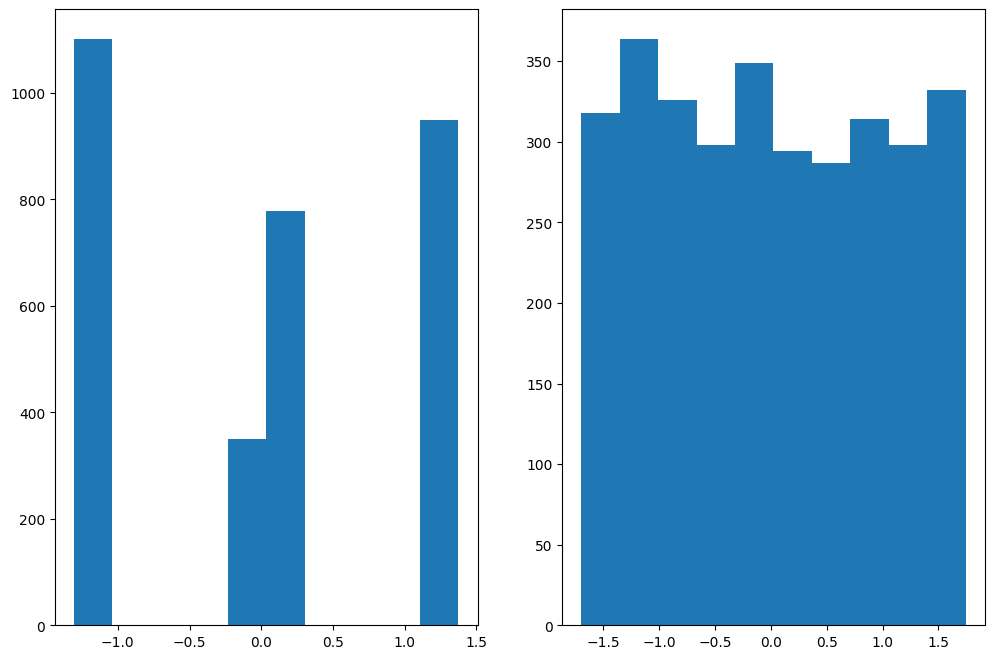

0.727629551937757 0.5735668925902735
2.6792885994575477 3.437518830763933
1.0 0.21153846153846156
0.38855518081788565 0.06553220023009101


In [5]:
for i in range(len(data[0:10])):
        
        print(f"\nProcessing Vano {i}")
        
        vano_id = data[i]['ID_VANO']
    
        try:
            
            idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(data, i)
            
            # plot_2d(cond_values, extremos_values, apoyo_values)
            
        
            print(extremos_values)
            
            _, extremos_values = analyze_backings(vano_length, idv, cond_values, apoyo_values, vert_values, extremos_values, dataf=None)
            
            print(extremos_values)
            
            # plot_2d(cond_values, extremos_values, apoyo_values)
            
            if extremos_values == -1:
                continue
            
            mat, rotated_conds, rotated_apoyos, rotated_vertices, rotated_extremos = rotate_vano(cond_values, extremos_values, apoyo_values, vert_values)
            
            rotated_conds = clean_outliers(rotated_conds, rotated_extremos)
            
            X_scaled,scaler_x,scaler_y,scaler_z = scale_conductor(rotated_conds)
     
            a1,b1 = np.histogram(X_scaled[0,:]/np.max(X_scaled[0,:]))
            a2,b2 = np.histogram(X_scaled[1,:]/np.max(X_scaled[1,:]))
            
            normalized_a1 = a1/np.max(a1)
            normalized_a2 = a2/np.max(a2)
            
            cond1 = np.abs(np.max(normalized_a1)-np.min(normalized_a1)) > np.abs(np.max(normalized_a2)-np.min(normalized_a2))
            cond2 = np.std(normalized_a1) > np.std(normalized_a2)
            
            if cond1:
                print("distribución horizontal")
                
            # elif np.abs(np.max(normalized_a2)-np.min(normalized_a2)) > 0.8 and cond2:
            #     print("distribución horizontal")
                    
            else:
                pass
                
            plot_2d(rotated_conds, rotated_extremos, rotated_apoyos)
            plt.show()
                    
            plt.figure(figsize=(12,8))
            plt.subplot(121)
            plt.hist(X_scaled[0,:])
            plt.subplot(122)
            plt.hist(X_scaled[1,:])
            plt.show()
                
            print(np.std(X_scaled[0,:]/np.max(X_scaled[0,:])), np.std(X_scaled[1,:]/np.max(X_scaled[1,:])))
            print(np.abs(np.max(X_scaled[0,:])-np.min(X_scaled[0,:])), np.abs(np.max(X_scaled[1,:])-np.min(X_scaled[1,:])))
            print(np.abs(np.max(normalized_a1)-np.min(normalized_a1)), np.abs(np.max(normalized_a2)-np.min(normalized_a2)))
            print(np.std(normalized_a1), np.std(normalized_a2))
                    
            
            
        except Exception as e:
            raise ValueError("a")
            print(f"Vano {vano_id} failed preprocess: {e}")